In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

In [2]:
# Task 1(a)

In [3]:
# Create data frame for Flight Delay data set. 
flight_df = pd.read_csv("FlightDelays(1).csv")

# Show the Flight Delay data frame dimensions.
print('Data Set Dimensions: ', flight_df.shape)

Data Set Dimensions:  (2201, 11)


In [4]:
# Task 1(b)

In [5]:
# To remove ‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame
flight_df = flight_df.drop(columns=['DEST', 'ORIGIN'])
flight_df

,SCH_TIME,CARRIER,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS
0,1455,OH,1455,184,5935,0,4,1,ontime
1,1640,DH,1640,213,6155,0,4,1,ontime
2,1245,DH,1245,229,7208,0,4,1,ontime
3,1715,DH,1709,229,7215,0,4,1,ontime
4,1039,DH,1035,229,7792,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,199,2761,0,6,31,ontime
2197,1700,RU,1653,213,2497,0,6,31,ontime
2198,1600,RU,1558,199,2361,0,6,31,ontime
2199,1359,RU,1403,199,2216,0,6,31,ontime


In [6]:
# To display the column data types 
flight_df.dtypes

SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object

In [7]:
# Task 1(c)

In [8]:
# To changing the CARRIER Variable to Category Type variable 
flight_df.CARRIER = flight_df.CARRIER.astype('category')
flight_df.CARRIER.cat.categories


# To change CARRIER to Dummy Variables.
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], drop_first=True)


In [9]:
print(flight_df.dtypes)

SCH_TIME       int64
DEP_TIME       int64
DISTANCE       int64
FL_NUM         int64
WEATHER        int64
WK_DAY         int64
MTH_DAY        int64
FL_STATUS     object
CARRIER_DH     uint8
CARRIER_DL     uint8
CARRIER_MQ     uint8
CARRIER_OH     uint8
CARRIER_RU     uint8
CARRIER_UA     uint8
CARRIER_US     uint8
dtype: object


In [10]:
# Task 1(d)

In [11]:
# To display the first 10 records of the modified flight_df data frame
flight_df.head(10)

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,1455,184,5935,0,4,1,ontime,0,0,0,1,0,0,0
1,1640,1640,213,6155,0,4,1,ontime,1,0,0,0,0,0,0
2,1245,1245,229,7208,0,4,1,ontime,1,0,0,0,0,0,0
3,1715,1709,229,7215,0,4,1,ontime,1,0,0,0,0,0,0
4,1039,1035,229,7792,0,4,1,ontime,1,0,0,0,0,0,0
5,840,839,228,7800,0,4,1,ontime,1,0,0,0,0,0,0
6,1240,1243,228,7806,0,4,1,ontime,1,0,0,0,0,0,0
7,1645,1644,228,7810,0,4,1,ontime,1,0,0,0,0,0,0
8,1715,1710,228,7812,0,4,1,ontime,1,0,0,0,0,0,0
9,2120,2129,228,7814,0,4,1,ontime,1,0,0,0,0,0,0


In [12]:
# Task 2(a)

In [13]:
# To develop predictors and outcome variables
predictors = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY','MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']
outcome = 'FL_STATUS'


# Split the data into training and validation sets
X = flight_df.drop(columns=['FL_STATUS'])
y = flight_df['FL_STATUS']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


Classes: delayed, ontime


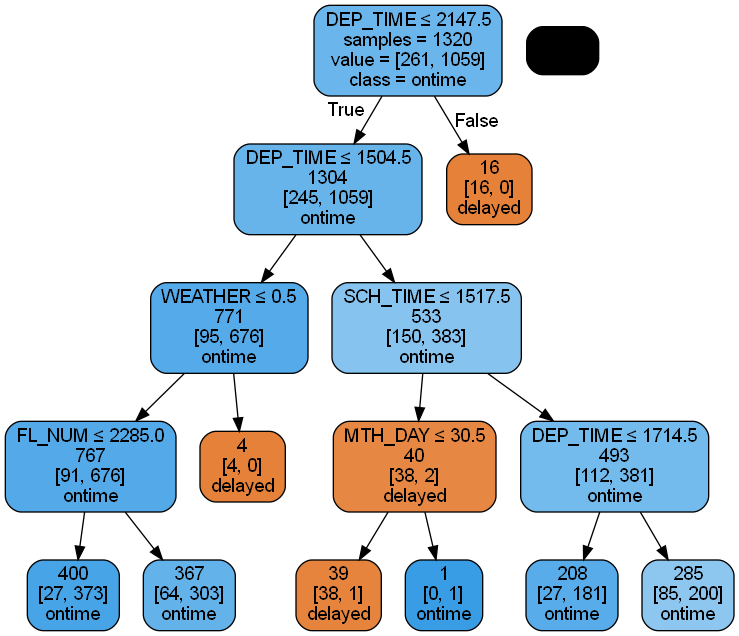

In [14]:
# To train the classification tree model using DecisionTreeClassifier() with the training data set 
class_tree = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.001, min_samples_split=30)
class_tree.fit(train_X, train_y)

# Display classes used in the classification tree: 'delayed' and 'ontime'.
print("Classes: {}".format(', '.join(class_tree.classes_)))

# To display the classification tree in Python using the plotDecionTree() function.
plotDecisionTree(class_tree, feature_names=train_X.columns, class_names=class_tree.classes_)

In [ ]:
# Task 2(c)

In [20]:
# To display confusion matrix for training partition. 
print("Training Confusion Matrix:")
classificationSummary(train_y, class_tree.predict(train_X))

print('')
print('')

# Identify  and display confusion matrix for validation partition. 
print("Validation Confusion Matrix:")
classificationSummary(valid_y, class_tree.predict(valid_X))

# Misclassification:
# Training 1 - Accuracy = 1-0.8500 = 0.15 = 15%
# Validation 1- Accuracy = 1- 0.8639 = 0.1361 = 13.61

Training Confusion Matrix:
Confusion Matrix (Accuracy 0.8455)

       Prediction
Actual    0    1
     0   58  203
     1    1 1058


Validation Confusion Matrix:
Confusion Matrix (Accuracy 0.8490)

       Prediction
Actual   0   1
     0  40 127
     1   6 708


In [ ]:
# Question 2(d)

In [23]:
new_dataframe = pd.DataFrame({
            'SCH_TIME': [1230,2050],  
            'DEP_TIME': [1240,2105],
            'DISTANCE': [214,199],
            'FL_NUM': [808, 4976],  
            'WEATHER': [1, 0],
            'WK_DAY': [4, 5],  
            'MTH_DAY': [20, 30],  
            'CARRIER_DH': [0, 0],  
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],  
            'CARRIER_OH': [0, 0],
            'CARRIER_RU': [0, 0],  
            'CARRIER_UA': [1, 0],
            'CARRIER_US': [0, 0],  
})

# To make classifications for new data. 
smallTree_predict = class_tree.predict(new_data)

# Classifications for new 'FlightDelays' data.
smallTree_results = pd.DataFrame({
            'SCH_TIME': [1230,2050],  
            'DEP_TIME': [1240,2105],
            'DISTANCE': [214,199],
            'FL_NUM': [808, 4976],  
            'WEATHER': [1, 0],
            'WK_DAY': [4, 5],  
            'MTH_DAY': [20, 30],  
            'CARRIER_DH': [0, 0],  
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],  
            'CARRIER_OH': [0, 0],
            'CARRIER_RU': [0, 0],  
            'CARRIER_UA': [1, 0],
            'CARRIER_US': [0, 0],  
            'Classification': smallTree_predict,
})

print(smallTree_results)

   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      1230      1240       214     808        1       4       20           0   
1      2050      2105       199    4976        0       5       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           0           0           0           1           0   
1           1           0           0           0           0           0   

  Classification  
0        delayed  
1         ontime  


In [ ]:
# Task 3(a)

In [29]:
# Improving grid search parameters.
parameters_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                parameters_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)

Improved score:0.8667
Improved parameters:  {'max_depth': 12, 'min_impurity_decrease': 0.001, 'min_samples_split': 18}


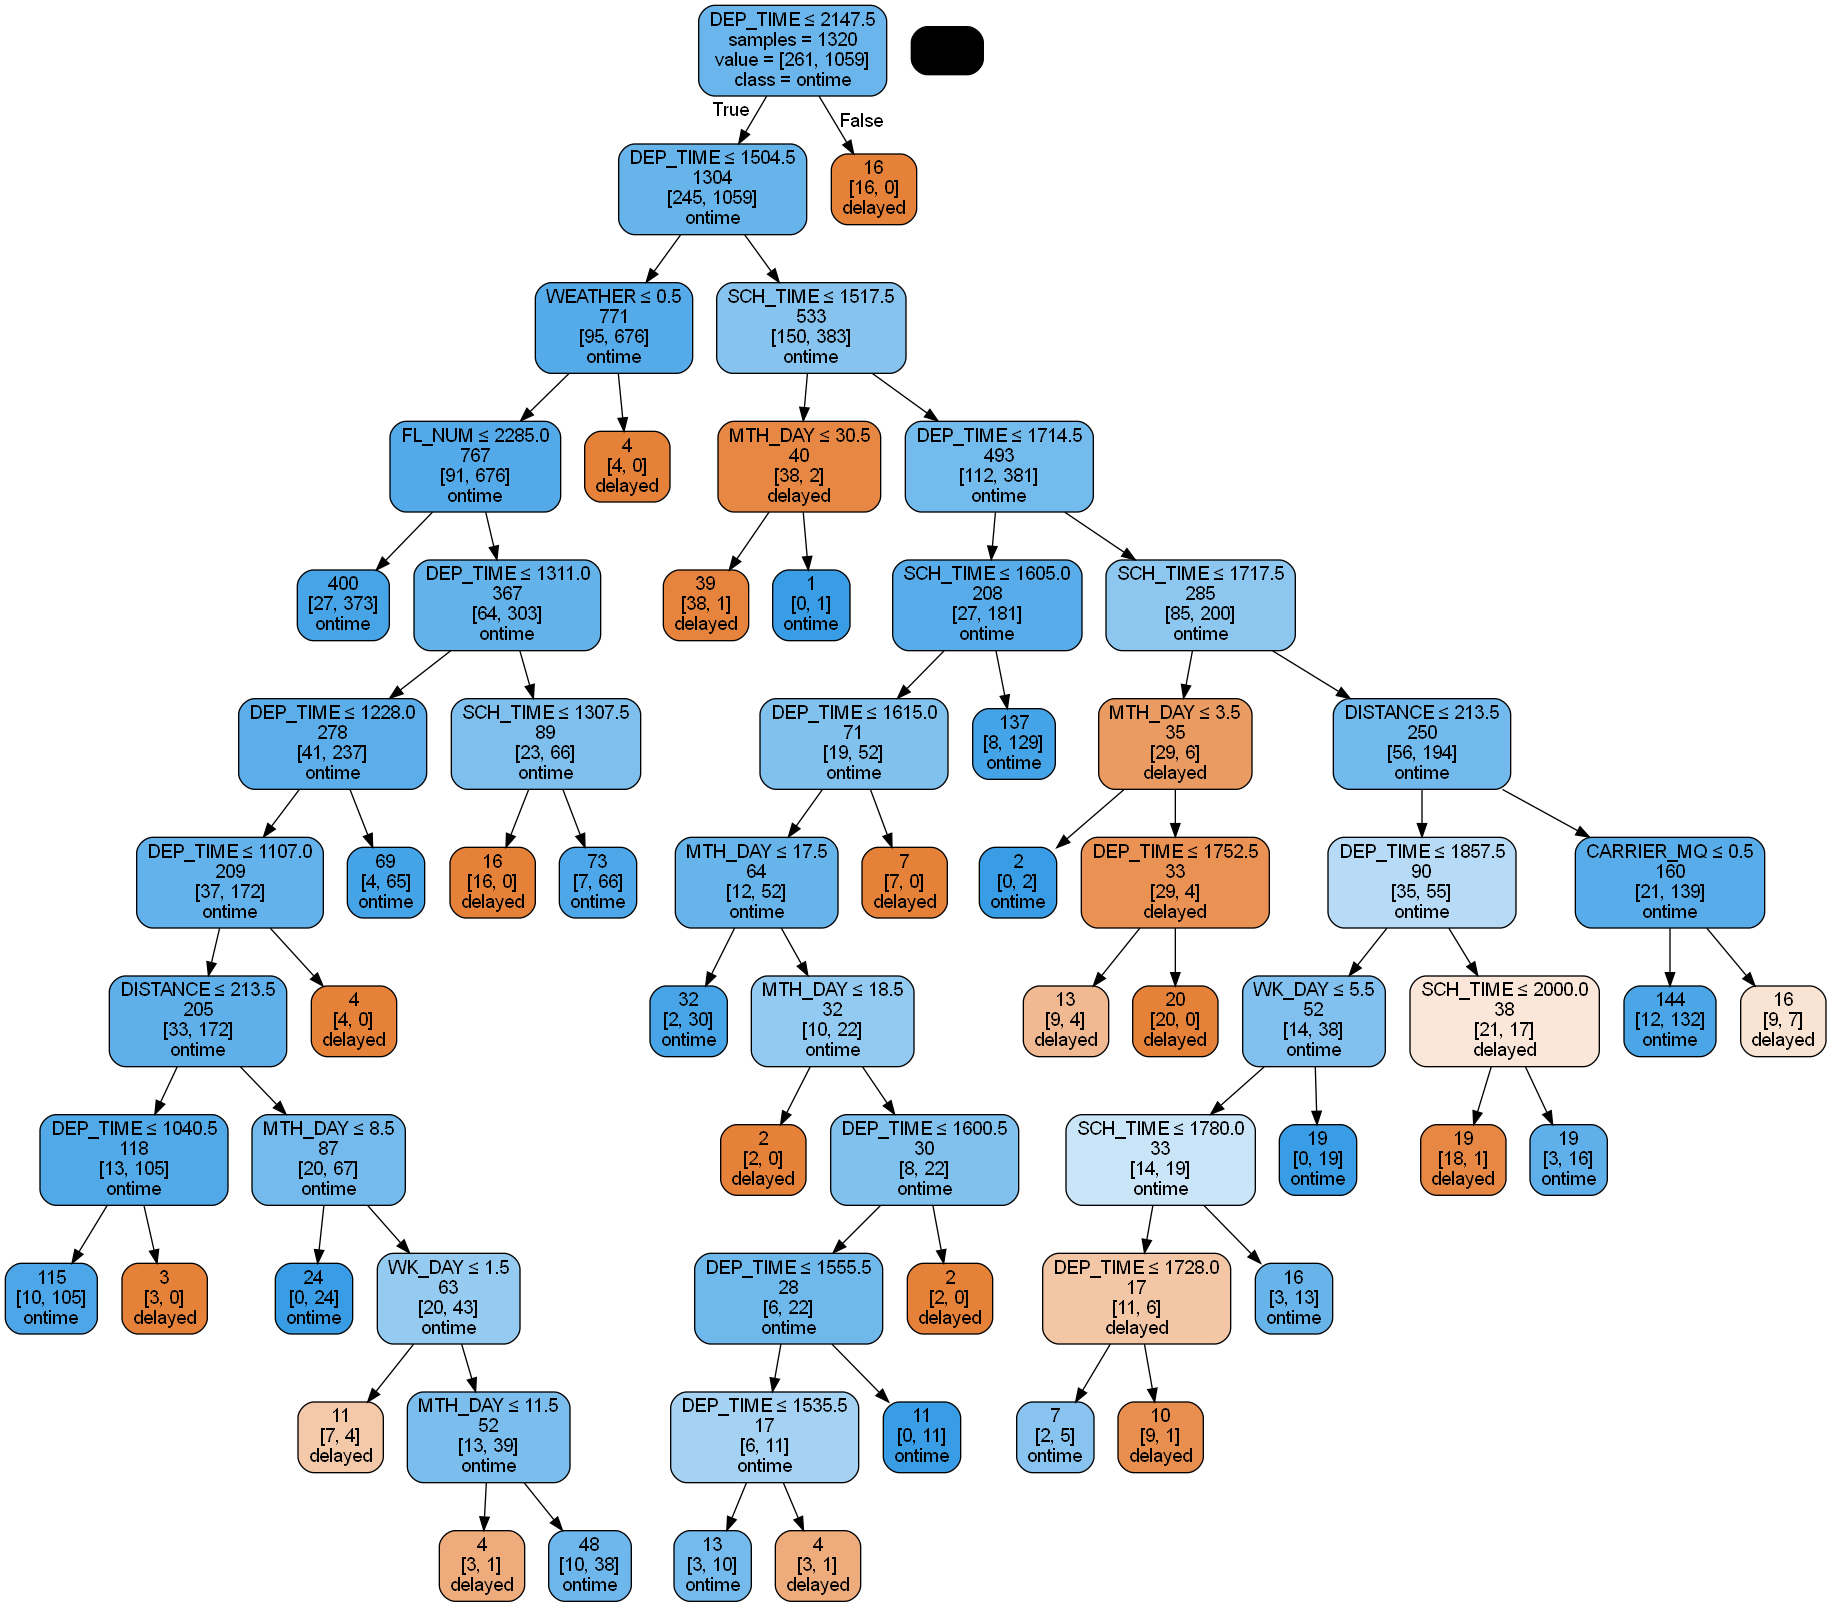

In [28]:
# To create and display classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=class_tree.classes_)

In [30]:
# Confusion matrices for grid search classification tree. 

# To display confusion matrix for training partition. 
classificationSummary(train_y, bestClassTree.predict(train_X))

# To display confusion matrix for validation partition. 
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9159)

       Prediction
Actual    0    1
     0  170   91
     1   20 1039
Confusion Matrix (Accuracy 0.8717)

       Prediction
Actual   0   1
     0  90  77
     1  36 678
